# Indrajit_Haridas_Assignment 1
### Github: https://github.com/Indrajitharidas/PythonClass

### Loding libraries

In [47]:
import numpy as np
import pandas as pd

## 1)	Load in the appropriate csv file as a pandas dataframe (batting.csv)

##### Load data

In [48]:
df = pd.read_csv('Batting.csv')
df.head()

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,Frank,Abercrombie,1850,1871,1,TRO,NaN,1,4,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,Bob,Addy,1842,1871,1,RC1,NaN,25,118,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,Art,Allison,1849,1871,1,CL1,NaN,29,137,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,Doug,Allison,1846,1871,1,WS3,NaN,27,133,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,Cap,Anson,1852,1871,1,RC1,NaN,25,120,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN


## 2)	Print out the dimensions and info about the dataframe you just created

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102816 entries, 0 to 102815
Data columns (total 25 columns):
playerID     102816 non-null object
nameFirst    102816 non-null object
nameLast     102816 non-null object
birthYear    102816 non-null int64
yearID       102816 non-null int64
stint        102816 non-null int64
teamID       102816 non-null object
lgID         102079 non-null object
G            102816 non-null int64
AB           102816 non-null int64
R            102816 non-null int64
H            102816 non-null int64
2B           102816 non-null int64
3B           102816 non-null int64
HR           102816 non-null int64
RBI          102392 non-null float64
SB           101516 non-null float64
CS           79360 non-null float64
BB           102816 non-null int64
SO           94978 non-null float64
IBB          66251 non-null float64
HBP          100006 non-null float64
SH           96478 non-null float64
SF           66782 non-null float64
GIDP         76706 non-null float

## 3)	How many players have hit 40 or more HRs in one single season? (Number only)

In [28]:
# Groupby using year and player
agg_df = df.groupby(['yearID', 'playerID'], as_index=False).sum()

# find number of unique player with given criteria (since some player have hit more tha 40 HR in multiple seasons)
agg_df.loc[agg_df['HR'] >= 40, 'playerID'].nunique()

142

## 4)	How many players have hit more than 600 HRs for their career? (Dataframe)

In [6]:
# Aggregate by playerID then filter the home run condition
agg_df = df.groupby('playerID').sum()
agg_df[agg_df['HR'] > 600]

,birthYear,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
playerID,,,,,,,,,,,,,,,,,,,,
aaronha01,44482,45195,23,3298,12364,2174,3771,624,98,755,2297.0,240.0,73.0,1402,1383.0,293.0,32.0,21.0,121.0,328.0
bondsba01,43208,43923,22,2986,9847,2227,2935,601,77,762,1996.0,514.0,141.0,2558,1539.0,688.0,106.0,4.0,91.0,165.0
griffke02,45287,45997,24,2671,9801,1662,2781,524,38,630,1836.0,184.0,69.0,1312,1779.0,246.0,81.0,8.0,102.0,199.0
mayswi01,44413,45145,24,2992,10881,2062,3283,523,140,660,1903.0,338.0,103.0,1464,1526.0,192.0,44.0,13.0,91.0,251.0
rodrial01,43450,44101,22,2784,10566,2021,3115,548,31,696,2086.0,329.0,76.0,1338,2287.0,97.0,176.0,16.0,111.0,261.0
ruthba01,41690,42339,22,2503,8398,2174,2873,506,136,714,2217.0,123.0,117.0,2062,1330.0,NaN,43.0,113.0,NaN,2.0
sosasa01,37392,37945,20,2354,8813,1475,2408,379,45,609,1667.0,234.0,107.0,929,2306.0,154.0,59.0,17.0,78.0,202.0
thomeji01,49250,50065,28,2543,8422,1583,2328,451,26,612,1699.0,19.0,20.0,1747,2548.0,173.0,69.0,1.0,74.0,165.0


## 5)	How many players have hit 40 2Bs, 10 3Bs, 200 Hits, and 30 HRs (inclusive) in one season? (Number Only)

In [3]:
agg_df = df.groupby(['yearID', 'playerID'], as_index = False).sum()
agg_df.loc[((agg_df['2B'] >= 40) & (agg_df['3B'] >= 10) & (agg_df['H'] >= 200) & (agg_df['HR'] >= 30)), 'playerID'].nunique()

11

## 6)	How many players have had 100 or more SBs in a season? (Dataframe)

In [8]:
# Aggregate
agg_df = df.groupby(['yearID', 'playerID', 'nameFirst', 'nameLast'], as_index = False).sum()

# Filter and make dataframe, display the same
pd.DataFrame(agg_df.loc[agg_df['SB'] >= 100, ['playerID', 'nameFirst', 'nameLast', 'yearID', 'SB']])

,playerID,nameFirst,nameLast,yearID,SB
3138,brownpe01,Pete,Browning,1887,103.0
3165,comisch01,Charlie,Comiskey,1887,117.0
3209,fogarji01,Jim,Fogarty,1887,102.0
3275,lathaar01,Arlie,Latham,1887,129.0
3322,nicolhu01,Hugh,Nicol,1887,138.0
3414,wardjo01,John,Ward,1887,111.0
3609,lathaar01,Arlie,Latham,1888,109.0
3645,nicolhu01,Hugh,Nicol,1888,103.0
3903,hamilbi01,Billy,Hamilton,1889,111.0
4276,hamilbi01,Billy,Hamilton,1890,102.0


## 7)	How many players in the 1960s have hit more than 200 HRs? (Dataframe)

In [59]:
#Filter 1960's
agg_df = df[df['yearID'].isin(range(1960, 1970, 1))]

# Aggregate
agg_df = agg_df.groupby(['playerID', 'nameFirst', 'nameLast'], as_index = False).sum()

# Filter and make dataframe, display the same
agg_df[agg_df['HR'] > 200][['playerID', 'nameFirst', 'nameLast', 'HR']].sort_values(by = 'HR', ascending = False)

,playerID,nameFirst,nameLast,HR
856,killeha01,Harmon,Killebrew,393
0,aaronha01,Hank,Aaron,375
1044,mayswi01,Willie,Mays,350
1372,robinfr02,Frank,Robinson,316
1057,mccovwi01,Willie,McCovey,300
751,howarfr01,Frank,Howard,288
279,cashno01,Norm,Cash,278
70,bankser01,Ernie,Banks,269
1009,mantlmi01,Mickey,Mantle,256
283,cepedor01,Orlando,Cepeda,254


## 8)	Who has hit the most HRs in history? (Dataframe)

In [10]:
# Aggregation by playerID
agg_df = df.groupby('playerID').sum()

# Filtering the condition
agg_df[agg_df['HR'] == max(agg_df.HR)]

,birthYear,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
playerID,,,,,,,,,,,,,,,,,,,,
bondsba01,43208,43923,22,2986,9847,2227,2935,601,77,762,1996.0,514.0,141.0,2558,1539.0,688.0,106.0,4.0,91.0,165.0


## 9)	Who had the most hits in the 1970s? (Dataframe)

In [12]:
# Aggregation
agg_df = df.groupby(['yearID', 'playerID', 'nameFirst', 'nameLast'], as_index = False).sum()
# Filtering the year range (1970's)
agg_df = agg_df[(agg_df['yearID'] >= 1970) & (agg_df['yearID'] <= 1979)]
agg_df = agg_df.groupby(['playerID', 'nameFirst', 'nameLast'], as_index = False).sum()
# Finding maximum hits!
agg_df.sort_values(by = 'H', ascending = False)[0:1][['playerID', 'nameFirst', 'nameLast', 'H']]


,playerID,nameFirst,nameLast,H
1639,rosepe01,Pete,Rose,2045


## 10)	Top 5 highest OBP (on base percentage) with at least 500 PAs in 1977?  (Dataframe)

In [60]:
# Aggregation
agg_df = df.groupby(['yearID', 'playerID', 'nameFirst', 'nameLast'], as_index = False).sum()
agg_df['OBP'] = (agg_df['H'] + agg_df['BB'] + agg_df['IBB'] + agg_df['SH'] + agg_df['SF']) / agg_df['AB']
agg_df['PA'] = agg_df['AB'] + agg_df['BB'] + agg_df['IBB'] + agg_df['SH'] + agg_df['SF']
# Filter the condition
agg_df = agg_df[(agg_df['yearID'] == 1977) & (agg_df['PA'] >= 500)]
# Sort values to find top 5
agg_df.sort_values(by = ['OBP'], ascending=False)[0:5][['playerID', 'nameFirst', 'nameLast', 'OBP', 'PA']]

,playerID,nameFirst,nameLast,OBP,PA
51247,singlke01,Ken,Singleton,0.563433,662.0
51254,smithre06,Reggie,Smith,0.559426,611.0
51302,tenacge01,Gene,Tenace,0.556064,578.0
50836,hargrmi01,Mike,Hargrove,0.540952,649.0
50637,carewro01,Rod,Carew,0.534091,706.0


## 11)	Top 8 highest averages in 2013 with at least 300 PAs? (Dataframe)

In [61]:
# Aggregation
agg_df = df.groupby(['yearID', 'playerID', 'nameFirst', 'nameLast'], as_index = False).sum()
agg_df['PA'] = agg_df['AB'] + agg_df['BB'] + agg_df['IBB'] + agg_df['SH'] + agg_df['SF']
agg_df['Average'] = agg_df['H'] / agg_df['AB']

# Filter conditions
agg_df = agg_df[(agg_df['yearID'] == 2013) & (agg_df['PA'] >= 300)]
# Sort to find top 8
agg_df.sort_values(by = ['Average'], ascending=False)[0:8][['playerID', 'nameFirst', 'nameLast', 'PA', 'Average']]

,playerID,nameFirst,nameLast,PA,Average
90092,cabremi01,Miguel,Cabrera,666.0,0.347748
90905,ramirha01,Hanley,Ramirez,336.0,0.345395
90194,cuddymi01,Michael,Cuddyer,543.0,0.331288
90684,mauerjo01,Joe,Mauer,515.0,0.323596
91121,troutmi01,Mike,Trout,717.0,0.322581
90520,johnsch05,Chris,Johnson,550.0,0.321012
90323,freemfr01,Freddie,Freeman,632.0,0.319419
90887,puigya01,Yasiel,Puig,427.0,0.319372


## 12)	Leaders in hits from 1940 up to and including 1949. (Dataframe) (Top 10 sorted by Hits)

In [17]:
# Aggregation
agg_df = df.groupby(['yearID', 'playerID', 'nameFirst', 'nameLast'], as_index = False).sum()
# Filter the constraints and sort to find top 10
agg_df = agg_df[(agg_df['yearID'] >= 1940) & (agg_df['yearID'] <= 1949)].sort_values(by = ['H'], ascending=False)
agg_df = agg_df.groupby(['playerID', 'nameFirst', 'nameLast'], as_index = False).sum()
# Finding maximum hits!
agg_df.sort_values(by = 'H', ascending = False)[0:10][['playerID', 'nameFirst', 'nameLast', 'H']]

,playerID,nameFirst,nameLast,H
138,boudrlo01,Lou,Boudreau,1578
427,elliobo01,Bob,Elliott,1563
1576,walkedi02,Dixie,Walker,1512
1103,musiast01,Stan,Musial,1432
390,doerrbo01,Bobby,Doerr,1407
712,holmeto01,Tommy,Holmes,1402
33,applilu01,Luke,Appling,1376
1127,nichobi01,Bill,Nicholson,1328
961,marioma01,Marty,Marion,1310
239,cavarph01,Phil,Cavarretta,1304


## 13)	Who led MLB with the most hits the most times?  And how many times?  (Dataframe, Number)

In [39]:
agg_df=df.groupby(['playerID','yearID'],as_index=False)[['H']].sum()
agg_df_max=agg_df.groupby('yearID',as_index=False)[['H']].max()
final_df=pd.merge(agg_df,agg_df_max,on=['yearID','H'],how='right')
most_hits=final_df.groupby('playerID',as_index=False)[['yearID']].count().rename(columns={'yearID':'Number_of_times'}).sort_values(by=['Number_of_times'],ascending=False).reset_index(drop=True)
print(most_hits[most_hits['Number_of_times']==max(most_hits['Number_of_times'])])
print("\n" + "The maximum number of times is " + str(max(most_hits['Number_of_times'])))

    playerID  Number_of_times
0  suzukic01                7
1   cobbty01                7
2   rosepe01                7

The maximum number of times is 7


## 14) Which players have played the most games for their careers?  Top 5, descending by games played presented as a dataframe

In [26]:
# Aggregation
agg_df = df.groupby(['playerID', 'nameFirst', 'nameLast'], as_index = False).sum()
#Sort by games and extract top 5
agg_df[['playerID', 'nameFirst', 'nameLast','G']].sort_values(by = 'G', ascending=False)[0:5]

,playerID,nameFirst,nameLast,G
14719,rosepe01,Pete,Rose,3562
18728,yastrca01,Carl,Yastrzemski,3308
1,aaronha01,Hank,Aaron,3298
7383,henderi01,Rickey,Henderson,3081
3155,cobbty01,Ty,Cobb,3035


## 15) How many players have had more than 3000 hits for their careers while also hitting 500 or more HRs?  Just a number is okay here

In [27]:
# Aggregation
agg_df = df.groupby(['playerID', 'nameFirst', 'nameLast'], as_index = False).sum()
# find length to get the number of players fulfilling the conditions
len(agg_df[(agg_df['H'] > 3000) & (agg_df['HR'] >= 500)])

5

## 16) How many HRs were hit during the entire 1988 season?  Just a number is okay here

In [28]:
# Aggregation
agg_df = df.groupby('yearID', as_index = False).sum()
# Filter the condition and chain the targeted parameter (HR)
agg_df[agg_df['yearID'] == 1988].HR

117    3180
Name: HR, dtype: int64

## 17) Please filter out and show me the top 3 average seasons by Wade Boggs during his career in seasons in which he had at least 500 ABs.  I would like a dataframe sorted by average.

In [30]:
# Aggregation
agg_df = df.groupby(['yearID', 'playerID', 'nameFirst', 'nameLast'], as_index = False).sum()
agg_df['Average'] = agg_df['H'] / agg_df['AB']

# Filter, sort, display
agg_df[(agg_df['AB'] >= 500) & (agg_df['nameFirst'] == 'Wade') & (agg_df['nameLast'] == 'Boggs')].sort_values(by = 'Average', ascending = False)[0:3][['yearID', 'playerID', 'nameFirst', 'nameLast', 'AB', 'Average']]

,yearID,playerID,nameFirst,nameLast,AB,Average
57921,1985,boggswa01,Wade,Boggs,653,0.367534
60800,1988,boggswa01,Wade,Boggs,584,0.366438
59818,1987,boggswa01,Wade,Boggs,551,0.362976


## 18) Please filter out the top OBPs for the 1995 season with at least 400 PAs, sorted by OBP.  I would like a dataframe for this
Assuming that top 10 has been asked

In [33]:
# Aggregation
agg_df = df.groupby(['yearID', 'playerID', 'nameFirst', 'nameLast'], as_index = False).sum()
agg_df['OBP'] = (agg_df['H'] + agg_df['BB'] + agg_df['IBB'] + agg_df['SH'] + agg_df['SF']) / agg_df['AB']
agg_df['PA'] = agg_df['AB'] + agg_df['BB'] + agg_df['IBB'] + agg_df['SH'] + agg_df['SF']
# Filter, sort, display
agg_df[(agg_df['yearID'] == 1995) & (agg_df['PA'] >= 400)].sort_values(by = 'OBP', ascending = False)[0:10][['yearID', 'playerID', 'nameFirst', 'nameLast', 'OBP', 'PA']]

,yearID,playerID,nameFirst,nameLast,OBP,PA
68848,1995,thomafr04,Frank,Thomas,0.667343,670.0
68474,1995,martied01,Edgar,Martinez,0.628180,650.0
68505,1995,mcgwima01,Mark,McGwire,0.586751,416.0
67953,1995,bondsba01,Barry,Bonds,0.583004,652.0
68081,1995,davisch01,Chili,Davis,0.577830,534.0
68458,1995,magadda01,Dave,Magadan,0.551724,431.0
68851,1995,thomeji01,Jim,Thome,0.542035,555.0
67892,1995,baineha01,Harold,Baines,0.524675,472.0
68926,1995,weisswa01,Walt,Weiss,0.524590,540.0
67950,1995,boggswa01,Wade,Boggs,0.510870,546.0


## 19) Who had the most 3Bs (in total) in 1922, 1925, 1926, and 1928?  I would like a dataframe with just the leader

In [20]:
# Filter using 'or' operator and the aggregate and then sort!
agg_df = df[(df['yearID'] == 1922) | (df['yearID'] == 1925) | (df['yearID'] == 1926) | (df['yearID'] == 1928)].groupby(['playerID', 'nameFirst', 'nameLast'], as_index = False).sum().sort_values(by = '3B', ascending = False)[0:1][['playerID', 'nameFirst', 'nameLast', '3B']]
# Show
agg_df

,playerID,nameFirst,nameLast,3B
1011,walkecu01,Curt,Walker,59


## 20) How many players have hit 30 or more HRs in season while also stealing (SB) 30 more or bases?  A number is okay here

In [35]:
# Aggregation
agg_df = df.groupby(['yearID', 'playerID', 'nameFirst', 'nameLast'], as_index = False).sum()
# Filter and count unique playerID's
agg_df[(agg_df['HR'] >= 30) & (agg_df['SB'] >= 30)]['playerID'].nunique()

38

## 21) Who had the highest OBP is 1986 with at least 400 PAs? (Dataframe)

In [36]:
# Aggregation
agg_df = df[df['yearID'] == 1986].groupby(['playerID', 'nameFirst', 'nameLast'], as_index = False).sum()
agg_df['OBP'] = (agg_df['H'] + agg_df['BB'] + agg_df['IBB'] + agg_df['SH'] + agg_df['SF']) / agg_df['AB']
agg_df['PA'] = agg_df['AB'] + agg_df['BB'] + agg_df['IBB'] + agg_df['SH'] + agg_df['SF']
# Filter and sort to get the topper!
agg_df[agg_df['PA'] >= 400].sort_values(by = 'OBP', ascending = False)[0:1]

,playerID,nameFirst,nameLast,birthYear,yearID,stint,G,AB,R,H,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,OBP,PA
78,boggswa01,Wade,Boggs,1958,1986,1,149,580,107,207,...,4.0,105,44.0,14.0,0.0,4.0,4.0,11.0,0.575862,707.0


## 22) Same question but for 1997 and only in the NL (check league ID)? (Dataframe)

In [37]:
# Samee process with a filter for lgID(leagueID)
agg_df = df[(df['yearID'] == 1997) & (df['lgID'] == 'NL')].groupby(['playerID', 'nameFirst', 'nameLast'], as_index = False).sum()
agg_df['OBP'] = (agg_df['H'] + agg_df['BB'] + agg_df['IBB'] + agg_df['SH'] + agg_df['SF']) / agg_df['AB']
agg_df['PA'] = agg_df['AB'] + agg_df['BB'] + agg_df['IBB'] + agg_df['SH'] + agg_df['SF']
agg_df[agg_df['PA'] >= 400].sort_values(by = 'OBP', ascending = False)[0:1]

,playerID,nameFirst,nameLast,birthYear,yearID,stint,G,AB,R,H,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,OBP,PA
60,bondsba01,Barry,Bonds,1964,1997,1,159,532,123,155,...,8.0,145,87.0,34.0,8.0,0.0,5.0,13.0,0.637218,716.0


## 23) Who had more than the league average HRs in 2012 (filter out all players with less 500 PAs)? (Dataframe)

In [23]:
# Aggregation
agg_df = df[(df['yearID'] == 2012)].groupby(['playerID', 'nameFirst', 'nameLast'], as_index = False).sum()
agg_df['PA'] = agg_df['AB'] + agg_df['BB'] + agg_df['IBB'] + agg_df['SH'] + agg_df['SF']
# Filter out the condition
agg_df[(agg_df['HR'] > np.mean(agg_df.HR)) & (agg_df['PA'] >= 500)].sort_values(by = 'HR', ascending = False)[['playerID', 'nameFirst', 'nameLast', 'HR', 'PA']]

,playerID,nameFirst,nameLast,HR,PA
156,cabremi01,Miguel,Cabrera,44,711.0
451,grandcu01,Curtis,Granderson,43,683.0
481,hamiljo03,Josh,Hamilton,43,644.0
348,encared01,Edwin,Encarnacion,42,645.0
331,dunnad01,Adam,Dunn,41,651.0
119,braunry02,Ryan,Braun,41,681.0
1121,stantmi03,Giancarlo,Stanton,37,505.0
82,beltrad01,Adrian,Beltre,36,657.0
1255,willijo03,Josh,Willingham,35,605.0
130,bruceja01,Jay,Bruce,34,640.0


## 24) Who is the youngest player to hit 50 or more HRs in a single season? (Dataframe)

In [24]:
# Aggregation
agg_df = df.groupby(['yearID', 'birthYear', 'playerID', 'nameFirst', 'nameLast'], as_index = False).sum()
agg_df['AgeAtTheTime'] = agg_df['yearID'] - agg_df['birthYear'] #Age at the time of the respective season
# Sort by birth year to get youngest player
agg_df[agg_df['HR'] >= 50].sort_values(by = 'AgeAtTheTime', ascending = True)[0:1]

,yearID,birthYear,playerID,nameFirst,nameLast,stint,G,AB,R,H,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,AgeAtTheTime
83459,2007,1984,fieldpr01,Prince,Fielder,1,158,573,109,165,...,2.0,2.0,90,121.0,21.0,14.0,0.0,4.0,9.0,23


## 25) Who are the five youngest players to hit 300 or more HRs for their career? (Dataframe)

In [53]:
# Aggregation
agg_df = df.groupby(['playerID', 'nameFirst', 'nameLast', 'birthYear', 'yearID']).sum().groupby(level=0).cumsum().reset_index()
agg_df = agg_df[agg_df['HR'] >= 300].sort_values(by = ['yearID', 'birthYear', 'playerID'])[['playerID', 'nameFirst', 'nameLast', 'birthYear', 'yearID', 'HR']]
agg_df['AgeAtTheTime'] = agg_df['yearID'] - agg_df['birthYear']
agg_df.sort_values(by = 'AgeAtTheTime', ascending = True)[0:5]

,playerID,nameFirst,nameLast,birthYear,yearID,HR,AgeAtTheTime
69369,pujolal01,Albert,Pujols,1980,2008,319,28
64767,ottme01,Mel,Ott,1909,1937,306,28
43074,jonesan01,Andruw,Jones,1977,2005,301,28
27852,foxxji01,Jimmie,Foxx,1907,1935,302,28
73216,rodrial01,Alex,Rodriguez,1975,2003,345,28


## Bonus Questions:
## Graph total HRs per season using bar graph

In [7]:
# Libraries
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

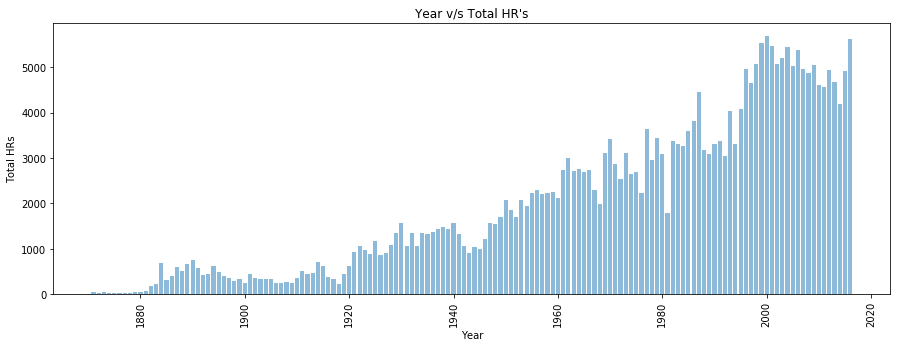

In [9]:
# Aggregation
agg_df = df.groupby('yearID', as_index = False).sum()
plt.figure(figsize = (15, 5))
# Plot the bar graph
plt.bar(agg_df['yearID'], agg_df['HR'], align='center', alpha=0.5)
# Rotate x labels for cleaner view
plt.xticks(rotation='vertical')
# y axis label
plt.ylabel('Total HRs')
plt.xlabel('Year')
# Title of the plot
plt.title("Year v/s Total HR's")
 
plt.show()

## Using a line graph please graph the average HRs per AB (think about this) per season

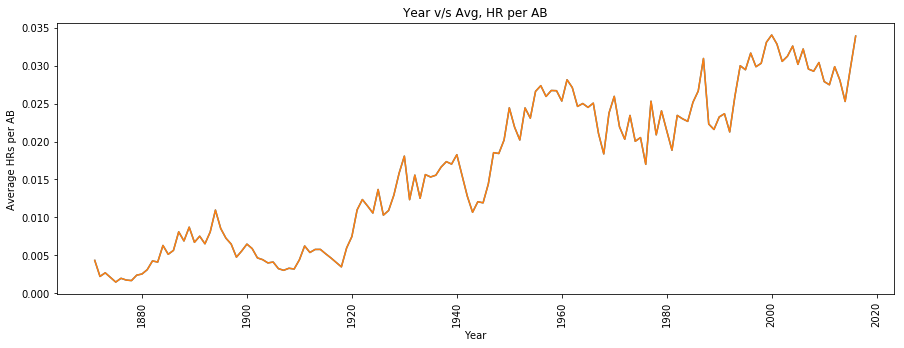

In [10]:
# Aggregate for average HR and total AB
agg_av_df = df.groupby('yearID', as_index = False).mean()[['yearID', 'HR']]
agg_sm_df = df.groupby('yearID', as_index = False).mean()[['yearID', 'AB']]

# Merge two aggregation
result = pd.concat([agg_av_df, agg_sm_df], axis=1)
result['Average HRs per AB'] = result['HR'] / result['AB']

# Plot line graph
plt.figure(figsize = (15, 5))
plt.plot(result['yearID'], result['Average HRs per AB'])
plt.xticks(rotation='vertical')
plt.ylabel('Average HRs per AB')
plt.xlabel('Year')
plt.title('Year v/s Avg, HR per AB')
 
plt.show()